### Lib and Open

In [31]:
import os
import pandas as pd

folder = "/Users/luisfaria/Desktop/sEngineer/masters_SWEAI/2025-T2/T2-REM/assignments/Assessment2"

# If in codespaces:
# folder = "/workspaces/masters-swe-ai/2025-T2/T2-REM/assignments/Assessment2"

# Open all .csv files in the folder
for file in os.listdir(folder):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(folder, file))
        print(df.shape)

# Load datasets
nps = pd.read_csv("nps/nps_data.csv")
revenue = pd.read_csv("sales/revenue_data.csv")

In [32]:
revenue.columns = ['month', 'Store', 'revenue', 'count_of_orders']

In [33]:
# Merging by store and month
df = pd.merge(nps, revenue, on=["Store", "month"], how="inner")

# Computing monthly averages
df["avg_nps"] = df.groupby("Store")["NPS"].transform("mean")

# Dataframe preview
df.head()


,month,Store,NPS,count_of_responses,revenue,count_of_orders,avg_nps
0,2024-01,BELO HORIZONTE,65.000000,40,111643.77,182,65.000000
1,2024-01,CAMPINAS,91.044776,67,114131.31,246,75.986733
2,2024-01,COPACABANA,80.281690,71,225878.13,250,74.070324
3,2024-01,IPIRANGA,69.230769,65,234789.84,305,69.230769
4,2024-01,ITAIM,30.769231,13,99281.93,128,55.494505


In [34]:
df.describe()[["NPS", "revenue"]]

,NPS,revenue
count,67.000000,67.000000
mean,75.820018,179285.282836
std,28.704604,112676.584657
min,-100.000000,48331.610000
25%,66.666667,95715.870000
50%,81.818182,158653.140000
75%,92.397388,222530.025000
max,100.000000,601662.020000


In [35]:
corr = df[["NPS", "revenue"]].corr(method="pearson")
corr

,NPS,revenue
NPS,1.000000,0.010176
revenue,0.010176,1.000000


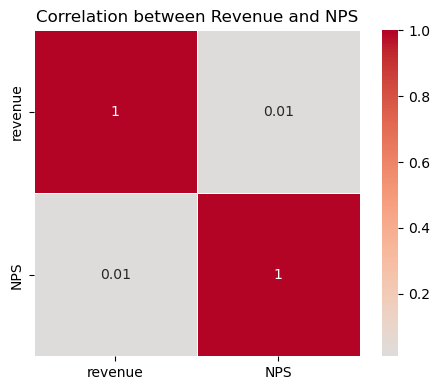

Correlation coefficient: 0.010


In [44]:
# Add correlation heatmap between revenue and NPS
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation heatmap
plt.figure(figsize=(5, 4))
correlation_matrix = df[['revenue', 'NPS']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation between Revenue and NPS')
plt.tight_layout()
plt.show()

# Print correlation coefficient
correlation = df['revenue'].corr(df['NPS'])
print(f"Correlation coefficient: {correlation:.3f}")


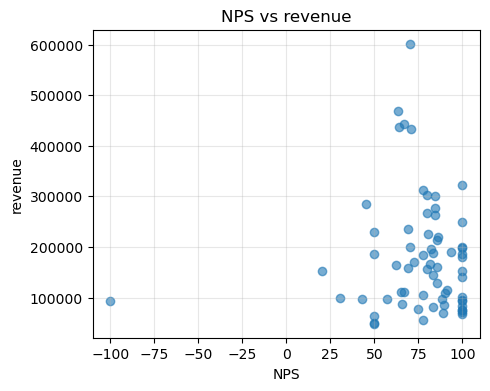

In [45]:
# Add scatter_nps_vs_revenue between NPS and revenue
def scatter_nps_vs_revenue(df):
    """Create scatter plot of NPS vs revenue"""
    plt.figure(figsize=(5, 4))
    plt.scatter(df['NPS'], df['revenue'], alpha=0.6)
    plt.xlabel('NPS')
    plt.ylabel('revenue')
    plt.title('NPS vs revenue')
    plt.grid(True, alpha=0.3)
    plt.show()

# Call the function
scatter_nps_vs_revenue(df)


In [36]:
# Export two clean visualizations from your .ipynb:
# 1.correlation_heatmap.png
# 2.scatter_nps_vs_revenue.png